In [4]:
%matplotlib inline

import pandas as pd
import os
import os.path as op

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Set working directory:

In [5]:
wd = '/mnt/scgc/simon/simonsproject/ani/GORG50_group_190114/'
os.chdir(wd)

Created file called 'contiglist.txt' containing paths to all GORG genomes > 50% complete.

fastANI command:

```
fastANI --rl contiglist.txt --ql contiglist.txt -t 50 -o GORG50_group_190114_fastani_out.txt
```

Now will remove redundancy in fastANI output comparisons:

In [9]:
infile = "GORG50_group_190114_fastani_out.txt"

names=['c1','c2','ani','frag_mappings','total_frags']

df = pd.read_csv(infile, sep="\t", names=names)

# columns with SAG names instead of file paths
df['genome1'] = [op.basename(i).split("_")[0] for i in df['c1']]
df['genome2'] = [op.basename(i).split("_")[0] for i in df['c2']]

pairs = []

for i, l in df.iterrows():
    genome_pair_string = "_".join(sorted([l['genome1'], l['genome2']]))
    pairs.append(genome_pair_string)
    
df['pair'] = pairs
df = df[df['genome1'] != df['genome2']]
dedupdf = df.sort_values(by='ani', ascending=False).drop_duplicates(subset='pair', keep='first')
dedupdf.to_csv("GORG50_group_190114_fastani_out_dedup.txt", index=False, sep="\t")

Plot ANI distributions

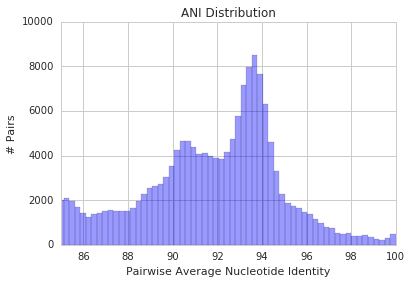

In [10]:
sns.set_style('whitegrid')
ax = sns.distplot(dedupdf['ani'], kde=False, bins=100, color = "blue")
ax.set_title("ANI Distribution")
ax.set_xlabel("Pairwise Average Nucleotide Identity")
ax.set_ylabel("# Pairs")

plt.xlim(85, 100)
plt.ylim(0,10000)
plt.savefig('GORG50_ani_85_to_100.svg')
plt.savefig('GORG50_ani_85_to_100.png', dpi=300)

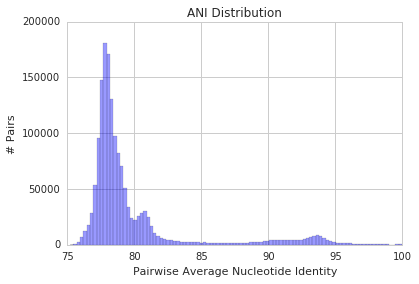

In [11]:
ax = sns.distplot(dedupdf['ani'], kde=False, bins=100, color="blue")
ax.set_title("ANI Distribution")
ax.set_xlabel("Pairwise Average Nucleotide Identity")
ax.set_ylabel("# Pairs")

plt.savefig('GORG50_ani.svg')
plt.savefig('GORG50_ani.png', dpi=300)